# IMPORT OF LIBRAIRIES 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import calendar
from functions import *
import urllib.parse
from matplotlib.pyplot import figure
import geoip2.database
import socket
from tld import get_tld

import re
import json
from urllib.request import urlopen
import pygeoip

import matplotlib.ticker as mtick

import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

from bs4 import BeautifulSoup
import requests
import re

from matplotlib.pyplot import figure

import warnings


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/adrien/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adrien/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/adrien/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
quotes_all_years = pd.io.json.read_json('Quotebank_climate_attributes/quotes-all-years.json.bz2', lines = True)

In [3]:
quotes_norm = pd.io.json.read_json('Quotebank_climate_attributes/Quote_frequency_day.json', orient = 'index')


In [4]:
quotes_norm['date'] = quotes_norm.index
quotes_norm['count']= quotes_norm[0]
quotes_norm.reset_index(drop = True, inplace = True)
quotes_norm.drop( columns = 0, inplace = True)

In [5]:
quotes_norm

,date,count
0,2015-08-31,67945
1,2015-12-08,87238
2,2015-09-10,84472
3,2015-07-23,88601
4,2015-10-04,43412
...,...,...
1929,2020-03-08,27171
1930,2020-03-28,22781
1931,2020-02-01,39262
1932,2020-04-12,19718


### Creation of a column containing the month when the month when the quote was reported


In [6]:
quotes_all_years['month'] = quotes_all_years['date'].dt.month.apply(lambda x: calendar.month_abbr[x])   
quotes_all_years

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,day,date_of_birth,nationality,gender,ethnic_group,occupation,party,religion,month
0,2015-02-09-029204,I want him to be Prime Minister because he sup...,None,[],2015-02-09 04:28:41,1,"[[None, 0.8177], [Malcolm Turnbull, 0.1823]]",[http://sbs.com.au/comedy/article/2015/02/09/w...,E,Monday,None,None,None,None,None,None,None,Feb
1,2015-01-26-037174,It is encouraging that they are backing their ...,None,[],2015-01-26 13:03:00,1,"[[None, 0.7101], [President Obama, 0.2899]]",[http://www.theclimategroup.org/what-we-do/new...,E,Monday,None,None,None,None,None,None,None,Jan
2,2015-07-22-062083,Labor's ambition is to see 50% of our electric...,Bill Shorten,[Q4910865],2015-07-22 01:21:51,2,"[[Bill Shorten, 0.8927], [None, 0.1073]]",[http://feeds.theguardian.com/c/34708/f/663879...,E,Wednesday,+1967-05-12T00:00:00Z,"[Australia, United Kingdom]",male,None,"[politician, lawyer, trade unionist]",Australian Labor Party,None,Jul
3,2015-09-28-067347,man-made emissions are an insignificant part o...,John Abraham,"[Q313025, Q3180862, Q47503507, Q6218074, Q6324...",2015-09-28 23:16:52,1,"[[John Abraham, 0.6469], [None, 0.3092], [Will...",[http://www.desmogblog.com/donors-capital-fund],E,Monday,None,None,None,None,None,None,None,Sep
4,2015-07-28-039461,I suppose Prime Minister Modi will decide at t...,Laurence Tubiana,[Q3218947],2015-07-28 17:39:32,2,"[[Laurence Tubiana, 0.9432], [None, 0.0568]]",[http://economictimes.indiatimes.com/news/poli...,E,Tuesday,+1951-07-05T00:00:00Z,France,female,None,"[economist, university teacher]",None,None,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207031,2020-02-21-007763,Both urgent and long-term actions are needed t...,None,[],2020-02-21 20:23:47,1,"[[None, 0.7482], [Greta Thunberg, 0.2518]]",[http://feeds.inquisitr.com/~r/google/yDYq/~3/...,E,Friday,None,None,None,None,None,None,None,Feb
207032,2020-04-10-020959,If we re-elect Donald Trump because we have tu...,None,[],2020-04-10 00:00:00,1,"[[None, 0.5234], [Mike Doyle, 0.4509], [Jim Bu...",[http://wesa.fm/post/mike-doyle-face-progressi...,E,Friday,None,None,None,None,None,None,None,Apr
207033,2020-04-11-013559,I'm talking about telling the fossil fuel indu...,Bernie Sanders,[Q359442],2020-04-11 04:00:00,2,"[[Bernie Sanders, 0.5636], [None, 0.3044], [Jo...",[https://www.commondreams.org/views/2020/04/11...,E,Saturday,+1941-09-08T00:00:00Z,United States of America,male,Jewish people,"[politician, journalist, carpenter, university...","[Liberty Union Party, Democratic Party, indepe...",Judaism,Apr
207034,2020-02-10-057505,"Obama got health care, Trump got his tax cut, ...",Tom Steyer,[Q16189531],2020-02-10 11:00:08,1,"[[Tom Steyer, 0.8143], [None, 0.1857]]",[https://thebulletin.org/2020/02/on-the-new-ha...,E,Monday,+1957-06-27T00:00:00Z,United States of America,male,None,"[businessperson, organizational founder, phila...",Democratic Party,None,Feb


In [7]:
quotes_all_years['date'] = quotes_all_years['date'].dt.date

In [8]:
quotes_all_years

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,day,date_of_birth,nationality,gender,ethnic_group,occupation,party,religion,month
0,2015-02-09-029204,I want him to be Prime Minister because he sup...,None,[],2015-02-09,1,"[[None, 0.8177], [Malcolm Turnbull, 0.1823]]",[http://sbs.com.au/comedy/article/2015/02/09/w...,E,Monday,None,None,None,None,None,None,None,Feb
1,2015-01-26-037174,It is encouraging that they are backing their ...,None,[],2015-01-26,1,"[[None, 0.7101], [President Obama, 0.2899]]",[http://www.theclimategroup.org/what-we-do/new...,E,Monday,None,None,None,None,None,None,None,Jan
2,2015-07-22-062083,Labor's ambition is to see 50% of our electric...,Bill Shorten,[Q4910865],2015-07-22,2,"[[Bill Shorten, 0.8927], [None, 0.1073]]",[http://feeds.theguardian.com/c/34708/f/663879...,E,Wednesday,+1967-05-12T00:00:00Z,"[Australia, United Kingdom]",male,None,"[politician, lawyer, trade unionist]",Australian Labor Party,None,Jul
3,2015-09-28-067347,man-made emissions are an insignificant part o...,John Abraham,"[Q313025, Q3180862, Q47503507, Q6218074, Q6324...",2015-09-28,1,"[[John Abraham, 0.6469], [None, 0.3092], [Will...",[http://www.desmogblog.com/donors-capital-fund],E,Monday,None,None,None,None,None,None,None,Sep
4,2015-07-28-039461,I suppose Prime Minister Modi will decide at t...,Laurence Tubiana,[Q3218947],2015-07-28,2,"[[Laurence Tubiana, 0.9432], [None, 0.0568]]",[http://economictimes.indiatimes.com/news/poli...,E,Tuesday,+1951-07-05T00:00:00Z,France,female,None,"[economist, university teacher]",None,None,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207031,2020-02-21-007763,Both urgent and long-term actions are needed t...,None,[],2020-02-21,1,"[[None, 0.7482], [Greta Thunberg, 0.2518]]",[http://feeds.inquisitr.com/~r/google/yDYq/~3/...,E,Friday,None,None,None,None,None,None,None,Feb
207032,2020-04-10-020959,If we re-elect Donald Trump because we have tu...,None,[],2020-04-10,1,"[[None, 0.5234], [Mike Doyle, 0.4509], [Jim Bu...",[http://wesa.fm/post/mike-doyle-face-progressi...,E,Friday,None,None,None,None,None,None,None,Apr
207033,2020-04-11-013559,I'm talking about telling the fossil fuel indu...,Bernie Sanders,[Q359442],2020-04-11,2,"[[Bernie Sanders, 0.5636], [None, 0.3044], [Jo...",[https://www.commondreams.org/views/2020/04/11...,E,Saturday,+1941-09-08T00:00:00Z,United States of America,male,Jewish people,"[politician, journalist, carpenter, university...","[Liberty Union Party, Democratic Party, indepe...",Judaism,Apr
207034,2020-02-10-057505,"Obama got health care, Trump got his tax cut, ...",Tom Steyer,[Q16189531],2020-02-10,1,"[[Tom Steyer, 0.8143], [None, 0.1857]]",[https://thebulletin.org/2020/02/on-the-new-ha...,E,Monday,+1957-06-27T00:00:00Z,United States of America,male,None,"[businessperson, organizational founder, phila...",Democratic Party,None,Feb


### Here create a serie containing the number of quotations per day in descending order 

In [9]:
quotes_date_occurence = quotes_all_years.groupby('date').date.count()
quotes_date_occurence = quotes_date_occurence.sort_values(ascending= False)
quotes_date_occurence.head(10)

date
2017-06-02    1098
2017-06-01     784
2015-11-30     762
2019-09-20     701
2015-12-01     547
2019-09-23     502
2019-09-19     464
2019-09-24     456
2019-09-25     452
2017-06-05     372
Name: date, dtype: int64

## Plot of the quotations reported per month

Text(-9.075000000000003, 0.5, 'Count')

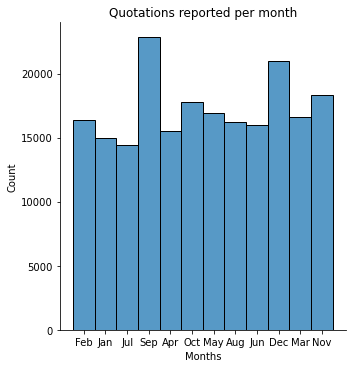

In [10]:
sns.displot(quotes_all_years['month'])
plt.title('Quotations reported per month')
plt.xlabel("Months")
plt.ylabel("Count")

### We then select  the quotations reported on peak days 

In [11]:
top_ten_days = quotes_date_occurence.index[:10].astype(str)
quotations_peak  = quotes_all_years[quotes_all_years['date'].astype(str).apply(lambda x: x in top_ten_days.to_list())]
quotations_peak.reset_index(drop = True, inplace = True)
quotations_peak

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,day,date_of_birth,nationality,gender,ethnic_group,occupation,party,religion,month
0,2015-11-30-137589,Women of Color Speak Out -- Climate Change and...,None,[],2015-11-30,1,"[[None, 0.9592], [Yin Yu, 0.0408]]",[http://www.nwasianweekly.com/2015/11/presenta...,E,Monday,None,None,None,None,None,None,None,Nov
1,2015-12-01-053425,In an attempt to score a cheap political point...,Tanya Plibersek,[Q7684036],2015-12-01,2,"[[Tanya Plibersek, 0.8804], [None, 0.1196]]",[http://www.news.com.au/national/politics/juli...,E,Tuesday,+1969-12-02T00:00:00Z,Australia,female,None,politician,Australian Labor Party,None,Dec
2,2015-12-01-095724,The climate change that we need is the climate...,Mike Huckabee,[Q158813],2015-12-01,1,"[[Mike Huckabee, 0.7624], [Chris Christie, 0.2...",[http://northjersey.com/news/christie-climate-...,E,Tuesday,+1955-08-24T00:00:00Z,United States of America,male,None,"[radio personality, politician, musician, writer]",Republican Party,Southern Baptist Convention,Dec
3,2015-11-30-138917,You can make a very reasonable argument that c...,Bill Nye,[Q2619019],2015-11-30,3,"[[Bill Nye, 0.7559], [None, 0.1992], [Presiden...",[http://feeds.huffingtonpost.com/c/35496/f/677...,E,Monday,+1955-11-27T00:00:00Z,United States of America,male,None,"[engineer, physicist, educator, writer, actor]",Democratic Party,None,Nov
4,2015-11-30-077809,only acceptable decision by EPA would have bee...,None,[],2015-11-30,1,"[[None, 0.9566], [President Obama, 0.0434]]",[http://pantagraph.com/business/epa-boosts-use...,E,Monday,None,None,None,None,None,None,None,Nov
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6133,2019-09-23-020326,Good intentions and recycled commitments will ...,Winnie Byanyima,[Q21759],2019-09-23,1,"[[Winnie Byanyima, 0.8078], [None, 0.1922]]",[http://www.aljazeera.com/ajimpact/fuel-flames...,E,Monday,+1959-01-13T00:00:00Z,Uganda,female,Ankole,"[engineer, politician, diplomat, entrepreneur,...",Forum for Democratic Change,Catholicism,Sep
6134,2019-09-24-089940,There are many items on the climate change age...,Jerry Brown,"[Q152451, Q717620]",2019-09-24,1,"[[Jerry Brown, 0.603], [None, 0.397]]",[https://www.dailycal.org/2019/09/23/uc-berkel...,E,Tuesday,None,None,None,None,None,None,None,Sep
6135,2019-09-19-048143,"In signing the Paris Agreement, national gover...",Christiana Figueres,[Q518828],2019-09-19,1,"[[Christiana Figueres, 0.7789], [None, 0.2211]]",[https://www.wri.org/news/2019/09/release-new-...,E,Thursday,+1956-08-07T00:00:00Z,Costa Rica,female,None,"[diplomat, economist, politician, climate acti...",National Liberation Party,None,Sep
6136,2019-09-20-062658,"Not only is it a climate crisis, but it's a cl...",Steve Bullock,"[Q24015, Q7612088, Q7612089]",2019-09-20,1,"[[Steve Bullock, 0.7709], [None, 0.2291]]",[https://thehoya.com/day-2-climate-forum-2020-...,E,Friday,None,None,None,None,None,None,None,Sep


## Plot of the number of quotations reported per day 

In [12]:
#number = list(set(quotes_norm.date.astype(str)) & set(quotes_all_years.date.unique().astype(str)))
#quotes_norm[quotes_norm.date.astype(str) == number ]
#quotes_norm[list(set(quotes_norm.date.astype(str)) & set(quotes_all_years.date.unique().astype(str)))]




Text(0.5, 1.0, 'Number of quotations reported per day ')

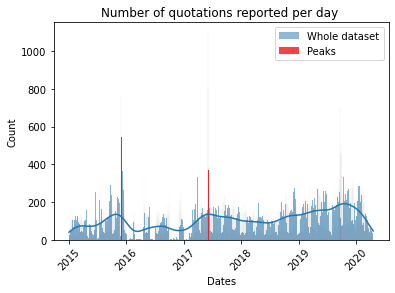

In [13]:
sns.histplot(quotes_all_years['date'],label = "Whole dataset", bins =5*365, kde = True)
sns.histplot(quotations_peak['date'], color = 'red',label = "Peaks") 
plt.xticks(rotation= 45 )
plt.xlabel('Dates')
plt.ylabel('Count')
plt.legend()

plt.title('Number of quotations reported per day ')

## sorting

In [14]:
dates_sorted = quotes_norm.sort_values(by=['date']).date
dates_sorted.reset_index(drop = True, inplace = True)

## Volume

In [15]:
quotes_2015 = quotes_all_years[quotes_all_years['date'].astype(str).str.contains("2015")]
quotes_norm_2015 = quotes_norm[quotes_norm.date.astype(str).str.contains("2015")]

quotes_2016 = quotes_all_years[quotes_all_years['date'].astype(str).str.contains("2016")]
quotes_norm_2016 = quotes_norm[quotes_norm.date.astype(str).str.contains("2016")]

quotes_2017 = quotes_all_years[quotes_all_years['date'].astype(str).str.contains("2017")]
quotes_norm_2017 = quotes_norm[quotes_norm.date.astype(str).str.contains("2017")]

quotes_2018 = quotes_all_years[quotes_all_years['date'].astype(str).str.contains("2018")]
quotes_norm_2018 = quotes_norm[quotes_norm.date.astype(str).str.contains("2018")]

quotes_2019 = quotes_all_years[quotes_all_years['date'].astype(str).str.contains("2019")]
quotes_norm_2019 = quotes_norm[quotes_norm.date.astype(str).str.contains("2019")]

quotes_2020 = quotes_all_years[quotes_all_years['date'].astype(str).str.contains("2020")]
quotes_norm_2020 = quotes_norm[quotes_norm.date.astype(str).str.contains("2020")]



In [16]:
prop_articles_all_years = (len(quotes_all_years['date'].unique()))/len(quotes_norm)
prop_articles_2015 = (len(quotes_2015['date'].unique()))/len(quotes_norm_2015)
prop_articles_2016 = (len(quotes_2016['date'].unique()))/len(quotes_norm_2016)
prop_articles_2017 = (len(quotes_2017['date'].unique()))/len(quotes_norm_2017)
prop_articles_2018 = (len(quotes_2018['date'].unique()))/len(quotes_norm_2018)
prop_articles_2019 = (len(quotes_2019['date'].unique()))/len(quotes_norm_2019)
prop_articles_2020 = (len(quotes_2020['date'].unique()))/len(quotes_norm_2020)

print("The proportion of days where there  is at least one article on climate during the whole study is {:.2%} \n".format(prop_articles_all_years))
print("The proportion of days where there  is at least one article on climate  is {:.2%}  in 2015\n".format(prop_articles_2015))
print("The proportion of days where there  is at least one article on climate  is {:.2%}  in 2016\n".format(prop_articles_2016))
print("The proportion of days where there  is at least one article on climate  is {:.2%}  in 2017\n".format(prop_articles_2017))
print("The proportion of days where there  is at least one article on climate  is {:.2%}  in 2018\n".format(prop_articles_2018))
print("The proportion of days where there  is at least one article on climate  is {:.2%}  in 2019\n".format(prop_articles_2019))
print("The proportion of days where there  is at least one article on climate  is {:.2%}  in 2020".format(prop_articles_2020))



The proportion of days where there  is at least one article on climate during the whole study is 97.47% 

The proportion of days where there  is at least one article on climate  is 99.73%  in 2015

The proportion of days where there  is at least one article on climate  is 89.07%  in 2016

The proportion of days where there  is at least one article on climate  is 97.81%  in 2017

The proportion of days where there  is at least one article on climate  is 100.00%  in 2018

The proportion of days where there  is at least one article on climate  is 100.00%  in 2019

The proportion of days where there  is at least one article on climate  is 100.00%  in 2020


Text(0, 0.5, 'Proportion')

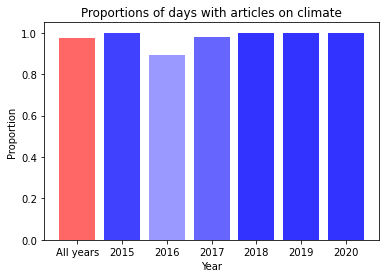

In [17]:
plt.bar("All years",prop_articles_all_years, color = 'red', alpha = 0.6)
ax = plt.bar('2015',prop_articles_2015, color = 'blue', alpha = 0.75)
ax = plt.bar('2016',prop_articles_2016, color = 'blue', alpha = 0.4)
ax = plt.bar('2017',prop_articles_2017,color = 'blue',alpha = 0.6 )
ax = plt.bar('2018',prop_articles_2018,color = 'blue', alpha = 0.8)
ax = plt.bar('2019',prop_articles_2019,color = 'blue', alpha = 0.8)
ax = plt.bar('2020',prop_articles_2020,color = 'blue', alpha = 0.8)
plt.title("Proportions of days with articles on climate")
plt.xlabel('Year')
plt.ylabel("Proportion")


## Trump

#### Month

In [18]:
quotes_Trump_Paris_Agreement = quotes_all_years[quotes_all_years['date'].astype(str) == '2017-06-02']
quotes_Trump_Paris_Agreement.reset_index(drop = True, inplace = True)
quotes_month_Trump_Paris_Agreement = quotes_2017[pd.to_datetime(quotes_2017.date).dt.month == 6]
quotes_month_Trump_Paris_Agreement.reset_index(drop = True, inplace = True)


                                                                                                    

Text(0.5, 1.0, 'Number of quotations reported per day for the month of June')

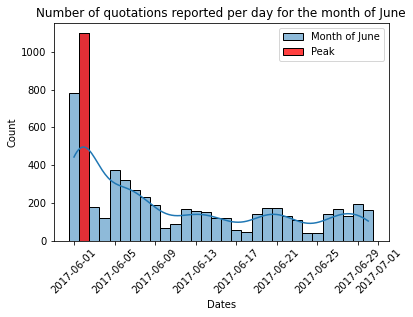

In [19]:
sns.histplot(quotes_month_Trump_Paris_Agreement['date'],label = "Month of June", bins =len(quotes_month_Trump_Paris_Agreement), kde = True)
sns.histplot(quotes_Trump_Paris_Agreement['date'], color = 'red',label = "Peak") 
plt.xticks(rotation= 45 )
plt.xlabel('Dates')
plt.ylabel('Count')
plt.legend()

plt.title('Number of quotations reported per day for the month of June')

#### Week

In [20]:
index_date_trump = dates_sorted[dates_sorted == '2017-06-02'].index[0]
min_trump = index_date_trump-7
max_trump = index_date_trump+7-1
date_min_trump = dates_sorted[min_trump]
date_max_trump = dates_sorted[max_trump]

interval_week_trump = quotes_all_years[(quotes_all_years['date'] >= date_min_trump) & 
                 (quotes_all_years['date'] <= date_max_trump)]


Text(0.5, 1.0, 'Number of quotations reported per day')

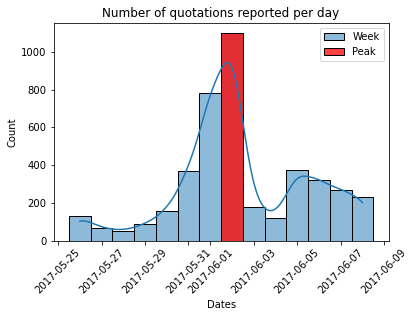

In [21]:
sns.histplot(interval_week_trump['date'],label = "Week", bins =len(interval_week_trump), kde = True)
sns.histplot(interval_week_trump[interval_week_trump['date'].astype(str) =='2017-06-02'].date, color = 'red',label = "Peak") 
plt.xticks(rotation= 45 )
plt.xlabel('Dates')
plt.ylabel('Count')
plt.legend()

plt.title('Number of quotations reported per day')


## COP21

#### Month

In [22]:
quotes_cop21 = quotes_all_years[quotes_all_years['date'].astype(str).str.contains('2015-11-30')]
quotes_cop21.reset_index(drop = True, inplace = True) 
quotes_month_cop21= quotes_2015[pd.to_datetime(quotes_2015.date).dt.month == 11 ]
quotes_month_cop21.reset_index(drop = True, inplace = True) 


Text(0.5, 1.0, 'Number of quotations reported per day for the month of November ')

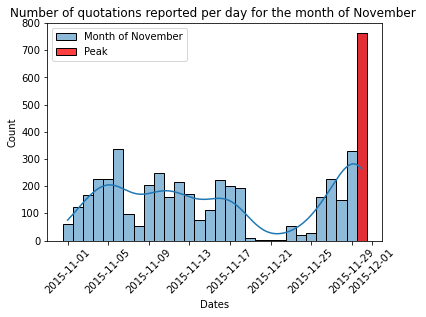

In [23]:
sns.histplot(quotes_month_cop21['date'],label = "Month of November", bins =len(quotes_month_cop21), kde = True)
sns.histplot(quotes_cop21['date'], color = 'red',label = "Peak") 
plt.xticks(rotation= 45 )
plt.xlabel('Dates')
plt.ylabel('Count')
plt.legend()

plt.title('Number of quotations reported per day for the month of November ')

#### Week

In [24]:
index_date_cop_21 = dates_sorted[dates_sorted == '2015-11-30'].index[0]
min_21 = index_date_cop_21-7
max_21 = index_date_cop_21+7-1
date_min_21 = dates_sorted[min_21]
date_max_21 = dates_sorted[max_21]

interval_week_cop_21 = quotes_all_years[(quotes_all_years['date'] >= date_min_21) & 
                 (quotes_all_years['date'] <= date_max_21)]


Text(0.5, 1.0, 'Number of quotations reported per day ')

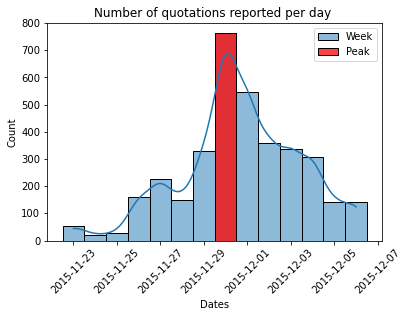

In [25]:
sns.histplot(interval_week_cop_21['date'],label = "Week", bins =len(interval_week_cop_21), kde = True)
sns.histplot(interval_week_cop_21[interval_week_cop_21['date'].astype(str) =='2015-11-30'].date, color = 'red',label = "Peak") 
plt.xticks(rotation= 45 )
plt.xlabel('Dates')
plt.ylabel('Count')
plt.legend()

plt.title('Number of quotations reported per day ')

 # coherence

In [26]:
## Pas utilisé mais permet de sortir l'article associé à l'url
def url_to_string(url):
    res = requests.get(url, timeout = 20,verify=False)
    html = res.text
    soup = BeautifulSoup(html, 'html5lib')
    for script in soup(["script", "style", 'aside']):
        script.extract()
    return " ".join(re.split(r'[\n\t]+', soup.get_text()))

## Trump out of paris agreements

In [27]:
#même chose qu'après mais avec les articles
warnings.filterwarnings('ignore')

doc = []
count = 0


for url in quotes_cop21.urls[:300]:
    try :
        if len(url_to_string(url[0]))>50:
            doc.append(url_to_string(url[0]))
            #count+=1
            #print(count)
    except:
        continue

In [28]:
len(doc)

259

In [29]:
doc_1 = pd.DataFrame(doc)

In [30]:

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Other NLP
import re
import spacy

from nltk.corpus import stopwords

# General Plotting
import matplotlib.pyplot as plt
 
import seaborn as sns


# Special Plotting
import pyLDAvis
import pyLDAvis.gensim_models 

# ignore some warnings 
import warnings
warnings.filterwarnings('ignore')

# Set the maximum number of rows displayed by pandas
pd.options.display.max_rows = 1000

# Set some CONSTANTS that will be used later
SEED    = 41  # base to generate a random number

In [31]:

from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/adrien/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
! python -m spacy download en_core_web_sm

  Using cached en_core_web_sm-2.3.1-py3-none-any.whl
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [33]:
spacy.load('en_core_web_sm')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adrien/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
def preprocess(txt):
    txt = " ".join(simple_preprocess(txt))
    
    
    
    return txt

In [35]:
doc_1[0] = doc_1[0].apply(lambda x : preprocess(x))

In [36]:
def lemmatize_text(txt):
    word_tokens = word_tokenize(txt)
    lemmatized_output = [WordNetLemmatizer().lemmatize(w) for w in word_tokens ]
    
    
    return lemmatized_output

In [37]:
doc_1[0] = doc_1[0].apply(lambda x : lemmatize_text(x))


In [38]:
# Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.

dictionary = corpora.Dictionary(doc_1[0])

In [39]:
#Filter out tokens that appear in
#less than 15 documents (absolute number) or
#more than 0.5 documents (fraction of total corpus size, not absolute number).
#after the above two steps, keep only the first 100000 most frequent tokens.

dictionary.filter_extremes(no_below = 5, no_above=0.3, keep_n= 200)

### Gensim doc2bow

In [40]:
#For each document we create a dictionary reporting how many
#words and how many times those words appear. Save this to ‘bow_corpus’, 
#then check our selected document earlier.
bow_corpus = [dictionary.doc2bow(q) for q in doc_1[0]]
#bow_corpus[12] #(token id, token count for document 12)

### LDA model

In [41]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics= 8, id2word=dictionary, passes=2, workers = 2)

 ## Visualization of the top keywwords for each model (topics)

In [42]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.025*"deal" + 0.023*"market" + 0.018*"research" + 0.017*"minister" + 0.013*"she" + 0.012*"threat" + 0.011*"think" + 0.011*"set" + 0.011*"down" + 0.011*"well"
Topic: 1 
Words: 0.052*"december" + 0.021*"fuel" + 0.017*"fossil" + 0.017*"company" + 0.015*"online" + 0.015*"market" + 0.015*"address" + 0.015*"member" + 0.014*"subscription" + 0.013*"account"
Topic: 2 
Words: 0.036*"scientist" + 0.036*"open" + 0.019*"book" + 0.015*"review" + 0.013*"fossil" + 0.012*"fuel" + 0.011*"human" + 0.010*"comment" + 0.010*"political" + 0.010*"find"
Topic: 3 
Words: 0.046*"india" + 0.024*"human" + 0.014*"commitment" + 0.014*"clean" + 0.013*"minister" + 0.013*"development" + 0.013*"renewable" + 0.012*"fight" + 0.012*"lead" + 0.012*"prime"
Topic: 4 
Words: 0.022*"fund" + 0.021*"development" + 0.020*"india" + 0.019*"company" + 0.016*"market" + 0.016*"opinion" + 0.015*"entertainment" + 0.015*"renewable" + 0.014*"environmental" + 0.014*"resource"
Topic: 5 
Words: 0.023*"minister" + 0.016*"dec"

In [43]:
cm = CoherenceModel(model=lda_model, texts = doc_1[0], dictionary = dictionary, coherence = 'c_v')
coherence = cm.get_coherence()  # get coherence value
print("The average coherence score for all the topics is ",coherence)

The average coherence score for all the topics is  0.2726158562679456


In [44]:
# Visualize topics-keywords
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.030370 -0.019250       1        1  18.791343
0     -0.028234  0.003828       2        1  17.335602
3      0.018028 -0.055730       3        1  13.514738
7     -0.036050  0.025203       4        1  11.986161
4      0.054667 -0.004004       5        1  11.964532
1      0.041883  0.014182       6        1   9.637076
6      0.028215  0.036456       7        1   8.416761
2     -0.048138 -0.000685       8        1   8.353786, topic_info=              Term        Freq       Total Category  logprob  loglift
5         december  229.000000  229.000000  Default  30.0000  30.0000
12           india  316.000000  316.000000  Default  29.0000  29.0000
21       scientist  155.000000  155.000000  Default  28.0000  28.0000
16            open  155.000000  155.000000  Default  27.0000  27.0000
126           city  239.000000  239.000000  Default  26.0000  26.0000
69          market  211.000000  211.000000  Default  25.0000  25.0000
165          below  154.000000  154.000000  Default  24.0000  24.0000
144          china  189.000000  189.000000  Default  23.0000  23.0000
42         company  197.000000  197.000000  Default  22.0000  22.0000
10           human  182.000000  182.000000  Default  21.0000  21.0000
51       financial  128.000000  128.000000  Default  20.0000  20.0000
14            life  180.000000  180.000000  Default  19.0000  19.0000
9             fuel  194.000000  194.000000  Default  18.0000  18.0000
154        natural  137.000000  137.000000  Default  17.0000  17.0000
8           fossil  163.000000  163.000000  Default  16.0000  16.0000
54            fund  170.000000  170.000000  Default  15.0000  15.0000
189           book  128.000000  128.000000  Default  14.0000  14.0000
36        building   98.000000   98.000000  Default  13.0000  13.0000
45     development  193.000000  193.000000  Default  12.0000  12.0000
88       renewable  139.000000  139.000000  Default  11.0000  11.0000
115          power  165.000000  165.000000  Default  10.0000  10.0000
50   environmental  144.000000  144.000000  Default   9.0000   9.0000
103           deal  217.000000  217.000000  Default   8.0000   8.0000
22    subscription  111.000000  111.000000  Default   7.0000   7.0000
183         access   97.000000   97.000000  Default   6.0000   6.0000
7    entertainment  154.000000  154.000000  Default   5.0000   5.0000
81          online  105.000000  105.000000  Default   4.0000   4.0000
159        release  144.000000  144.000000  Default   3.0000   3.0000
17         opinion  176.000000  176.000000  Default   2.0000   2.0000
19            post  122.000000  122.000000  Default   1.0000   1.0000
65              le   63.431759  119.235962   Topic1  -4.2830   1.0406
31          barack   40.696435   83.416717   Topic1  -4.7268   0.9541
170            dec   75.163178  155.074188   Topic1  -4.1133   0.9475
141             un   72.400386  149.551381   Topic1  -4.1507   0.9463
101         attack   50.603117  116.984019   Topic1  -4.5089   0.8337
71            meet   35.635956   90.420688   Topic1  -4.8596   0.7407
122           told   55.916032  142.536471   Topic1  -4.4091   0.7360
136          prime   59.268887  154.935063   Topic1  -4.3509   0.7109
192            act   34.949341   94.998807   Topic1  -4.8790   0.6718
75          monday   46.762581  127.682716   Topic1  -4.5879   0.6673
72         meeting   52.701492  147.191879   Topic1  -4.4683   0.6447
164          white   25.178432   72.165019   Topic1  -5.2070   0.6188
131         french   37.034184  107.076392   Topic1  -4.8211   0.6101
134       minister  105.022924  306.527266   Topic1  -3.7788   0.6006
109             go   38.811645  117.170671   Topic1  -4.7742   0.5669
11       including   41.984884  127.798988   Topic1  -4.6956   0.5586
44             cut   24.983773   79.387292   Topic1  -5.2147   0.5157
121          three   29.665129   95.336674   Topic1  -5.0

## Keywords 

## Trump out of paris agreements

In [45]:
quote_trump = " ".join([quote for quote in quotes_Trump_Paris_Agreement.quotation])


In [46]:
article = nlp(quote_trump)
items = [x.text for x in article.ents]
sentences = [x for x in article.sents]
count_trump = Counter(items).most_common(10)
count_trump = pd.DataFrame(count_trump, columns = ["Entity", "Count"])
count_trump 

,Entity,Count
0,Trump,128
1,Paris,124
2,U.S.,93
3,China,91
4,the Paris Agreement,72
5,US,65
6,the United States,62
7,America,44
8,American,38
9,today,35


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Trump'),
  Text(1, 0, 'Paris'),
  Text(2, 0, 'U.S.'),
  Text(3, 0, 'China'),
  Text(4, 0, 'the Paris Agreement'),
  Text(5, 0, 'US'),
  Text(6, 0, 'the United States'),
  Text(7, 0, 'America'),
  Text(8, 0, 'American'),
  Text(9, 0, 'today')])

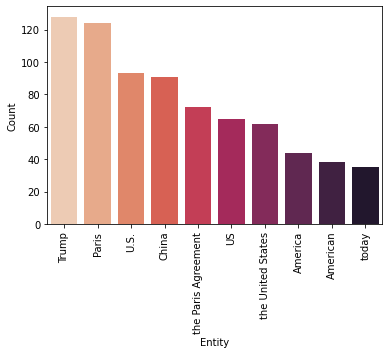

In [47]:
sns.barplot(x = count_trump.Entity, y = count_trump.Count, palette="rocket_r")
plt.xticks(rotation= 90, )


In [48]:
displacy.render(nlp(str(sentences[:20])), jupyter=True, style='ent')

## COP21

In [49]:
total_quotes_cop21 = " ".join([quote for quote in quotes_cop21.quotation])


In [50]:
article = nlp(total_quotes_cop21)
items = [x.text for x in article.ents]
sentences = [x for x in article.sents]
count_cop21 = Counter(items).most_common(10)
count_cop21 = pd.DataFrame(count_cop21 , columns = ["Entity", "Number of occurences"])
count_cop21


,Entity,Number of occurences
0,Paris,76
1,today,31
2,first,27
3,India,25
4,Canada,24
5,Obama,19
6,one,18
7,the United States,17
8,two,17
9,America,11


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Paris'),
  Text(1, 0, 'today'),
  Text(2, 0, 'first'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'Obama'),
  Text(6, 0, 'one'),
  Text(7, 0, 'the United States'),
  Text(8, 0, 'two'),
  Text(9, 0, 'America')])

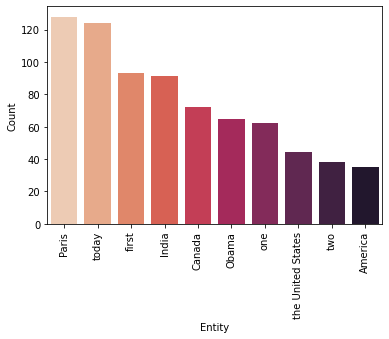

In [51]:
sns.barplot(x = count_cop21.Entity, y = count_trump.Count, palette="rocket_r")
plt.xticks(rotation= 90, )

In [52]:
displacy.render(nlp(str(sentences[:20])), jupyter=True, style='ent')

## Prop of non male speakers

In [53]:

non_male_speakers = quotes_all_years[(quotes_all_years.gender != 'male') & (quotes_all_years.gender != 'None')].date
male_speakers = quotes_all_years[(quotes_all_years.gender == 'male')].date

prop_male =(male_speakers.value_counts()/quotes_all_years[quotes_all_years.gender != 'None'].date.value_counts()).fillna(0)
prop_non_male = (non_male_speakers.value_counts()/quotes_all_years[quotes_all_years.gender != 'None'].date.value_counts()).fillna(0)

prop_non_male =  pd.DataFrame(prop_non_male)
prop_non_male.rename(columns = {'date':'frequency'}, inplace = True)
prop_non_male['date'] = prop_non_male.index
prop_non_male.reset_index(drop = True, inplace = True)
prop_non_male['date_ordinal'] = pd.to_datetime(prop_non_male['date']).apply(lambda date: date.toordinal())
prop_non_male

prop_male =  pd.DataFrame(prop_male)
prop_male.rename(columns = {'date':'frequency'}, inplace = True)
prop_male['date'] = prop_male.index
prop_male.reset_index(drop = True, inplace = True)
prop_male['date_ordinal'] = pd.to_datetime(prop_male['date']).apply(lambda date: date.toordinal())
prop_male



,frequency,date,date_ordinal
0,1.000000,2015-01-01,735599
1,0.944444,2015-01-02,735600
2,0.600000,2015-01-03,735601
3,0.818182,2015-01-04,735602
4,0.800000,2015-01-05,735603
...,...,...,...
1844,0.375000,2020-04-13,737528
1845,0.833333,2020-04-14,737529
1846,0.666667,2020-04-15,737530
1847,0.900000,2020-04-16,737531


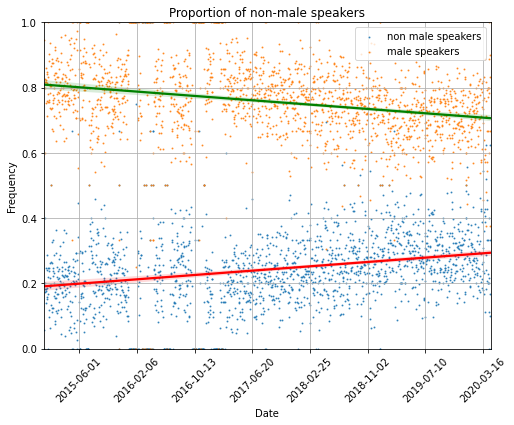

/Users/adrien/opt/anaconda3/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/adrien/opt/anaconda3/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/adrien/opt/anaconda3/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/adrien/opt/anaconda3/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/adrien/opt/anaconda3/lib/python3.7/site-packages/past/builtins/mi

In [54]:
ax = sns.regplot(data=prop_non_male,x='date_ordinal',y="frequency", scatter_kws={"s": 0.9} , 
                 line_kws={"color": "red"}, order = 1, label = 'non male speakers')

ax = sns.regplot(data=prop_male,x='date_ordinal',y="frequency", scatter_kws={"s": 0.9} ,
                 line_kws={"color": "green"}, order = 1, label = 'male speakers')


ax.set_xlabel('Date')
ax.set_ylabel('Frequency')

new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)
plot =plt.xticks(rotation= 45)
plt.title("Proportion of non-male speakers")
ax.set_ylim(0, 1)
plt.gcf().set_size_inches(8, 6)
plt.legend( prop={'size': 10})
plt.grid()
plt.show()
